# 安徽安庆市项目`WRF-CMAQ`模拟分析
## 模拟结果分析：*`Process Analysis`*

---
*@author: Evan*\
*@date: 2023-05-14*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../src/')
import ModelEvaLib as me

## 读取数据

In [2]:
pa=xr.open_dataset('F:/Data/case_anqing/April/April_PA1.nc')
pa

<xarray.Dataset>
Dimensions:    (time: 720, level: 38, y: 138, x: 135)
Coordinates:
  * time       (time) datetime64[ns] 2023-04-01 ... 2023-04-30T23:00:00
  * level      (level) float64 1e+03 998.0 995.8 993.4 ... 135.8 101.5 72.89
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    HADV_O3    (time, level, y, x) float32 ...
    ZADV_O3    (time, level, y, x) float32 ...
    HDIF_O3    (time, level, y, x) float32 ...
    VDIF_O3    (time, level, y, x) float32 ...
    DDEP_O3    (time, level, y, x) float32 ...
    CHEM_O3    (time, level, y, x) float32 ...
    HNO3prod   (time, level, y, x) float32 ...
    H2O2prod   (time, level, y, x) float32 ...
    O3prod     (time, level, y, x) float32 ...
    O3loss     (time, level, y, x) float32 ...
Attributes:
    case:     Anqing_202304
    grid:     CN3AH_135X138

In [3]:
HADV = pa.HADV_O3
ZADV = pa.ZADV_O3
HDIF = pa.HDIF_O3
VDIF = pa.VDIF_O3
DDEP = pa.DDEP_O3
CHEM = pa.CHEM_O3

In [4]:
import geopandas as gpd
shpurban = 'F:/Data/case_anqing/shapefile/Anqing_urban/urban.shp'
shp = gpd.read_file(shpurban)
for i in range(np.size(pa.latitude,0)):
    for j in range(np.size(pa.latitude,1)):
        if me.polygon_to_mask(shp.geometry[0],pa.longitude[i,j],pa.latitude[i,j])==False:
            HADV[:,:,i,j] = np.nan
            ZADV[:,:,i,j] = np.nan
            HDIF[:,:,i,j] = np.nan
            VDIF[:,:,i,j] = np.nan
            DDEP[:,:,i,j] = np.nan
            CHEM[:,:,i,j] = np.nan
            
hadv = np.nanmean(np.nanmean(HADV,2),2)
zadv = np.nanmean(np.nanmean(ZADV,2),2)
hdif = np.nanmean(np.nanmean(HDIF,2),2)
vdif = np.nanmean(np.nanmean(VDIF,2),2)
ddep = np.nanmean(np.nanmean(DDEP,2),2)
chem = np.nanmean(np.nanmean(CHEM,2),2)

分别提取白天和夜晚数据后求平均，白天：6-18h

In [16]:
# 定义数组名称列表
arrays = ['hadv', 'zadv', 'hdif', 'vdif', 'ddep', 'chem']
nlevel=28

hadv_pos = np.maximum(0,hadv[:,:nlevel])
hadv_neg = np.minimum(0,hadv[:,:nlevel])
zadv_pos = np.maximum(0,zadv[:,:nlevel])
zadv_neg = np.minimum(0,zadv[:,:nlevel])
hdif_pos = np.maximum(0,hdif[:,:nlevel])
hdif_neg = np.minimum(0,hdif[:,:nlevel])
vdif_pos = np.maximum(0,vdif[:,:nlevel])
vdif_neg = np.minimum(0,vdif[:,:nlevel])
chem_pos = np.maximum(0,chem[:,:nlevel])
chem_neg = np.minimum(0,chem[:,:nlevel])
ddep_pos = np.maximum(0,ddep[:,:nlevel])
ddep_neg = np.minimum(0,ddep[:,:nlevel])

hadv_pos.shape

(720, 28)

## 绘图

In [23]:
edgec      = 'white'
color_hadv = '#4994c4'
color_zadv = '#a8b092'
color_hdif = '#00cca6'
color_vdif = '#e5a84b'
color_chem = '#e2a2ac'
color_ddep = '#ad7761'

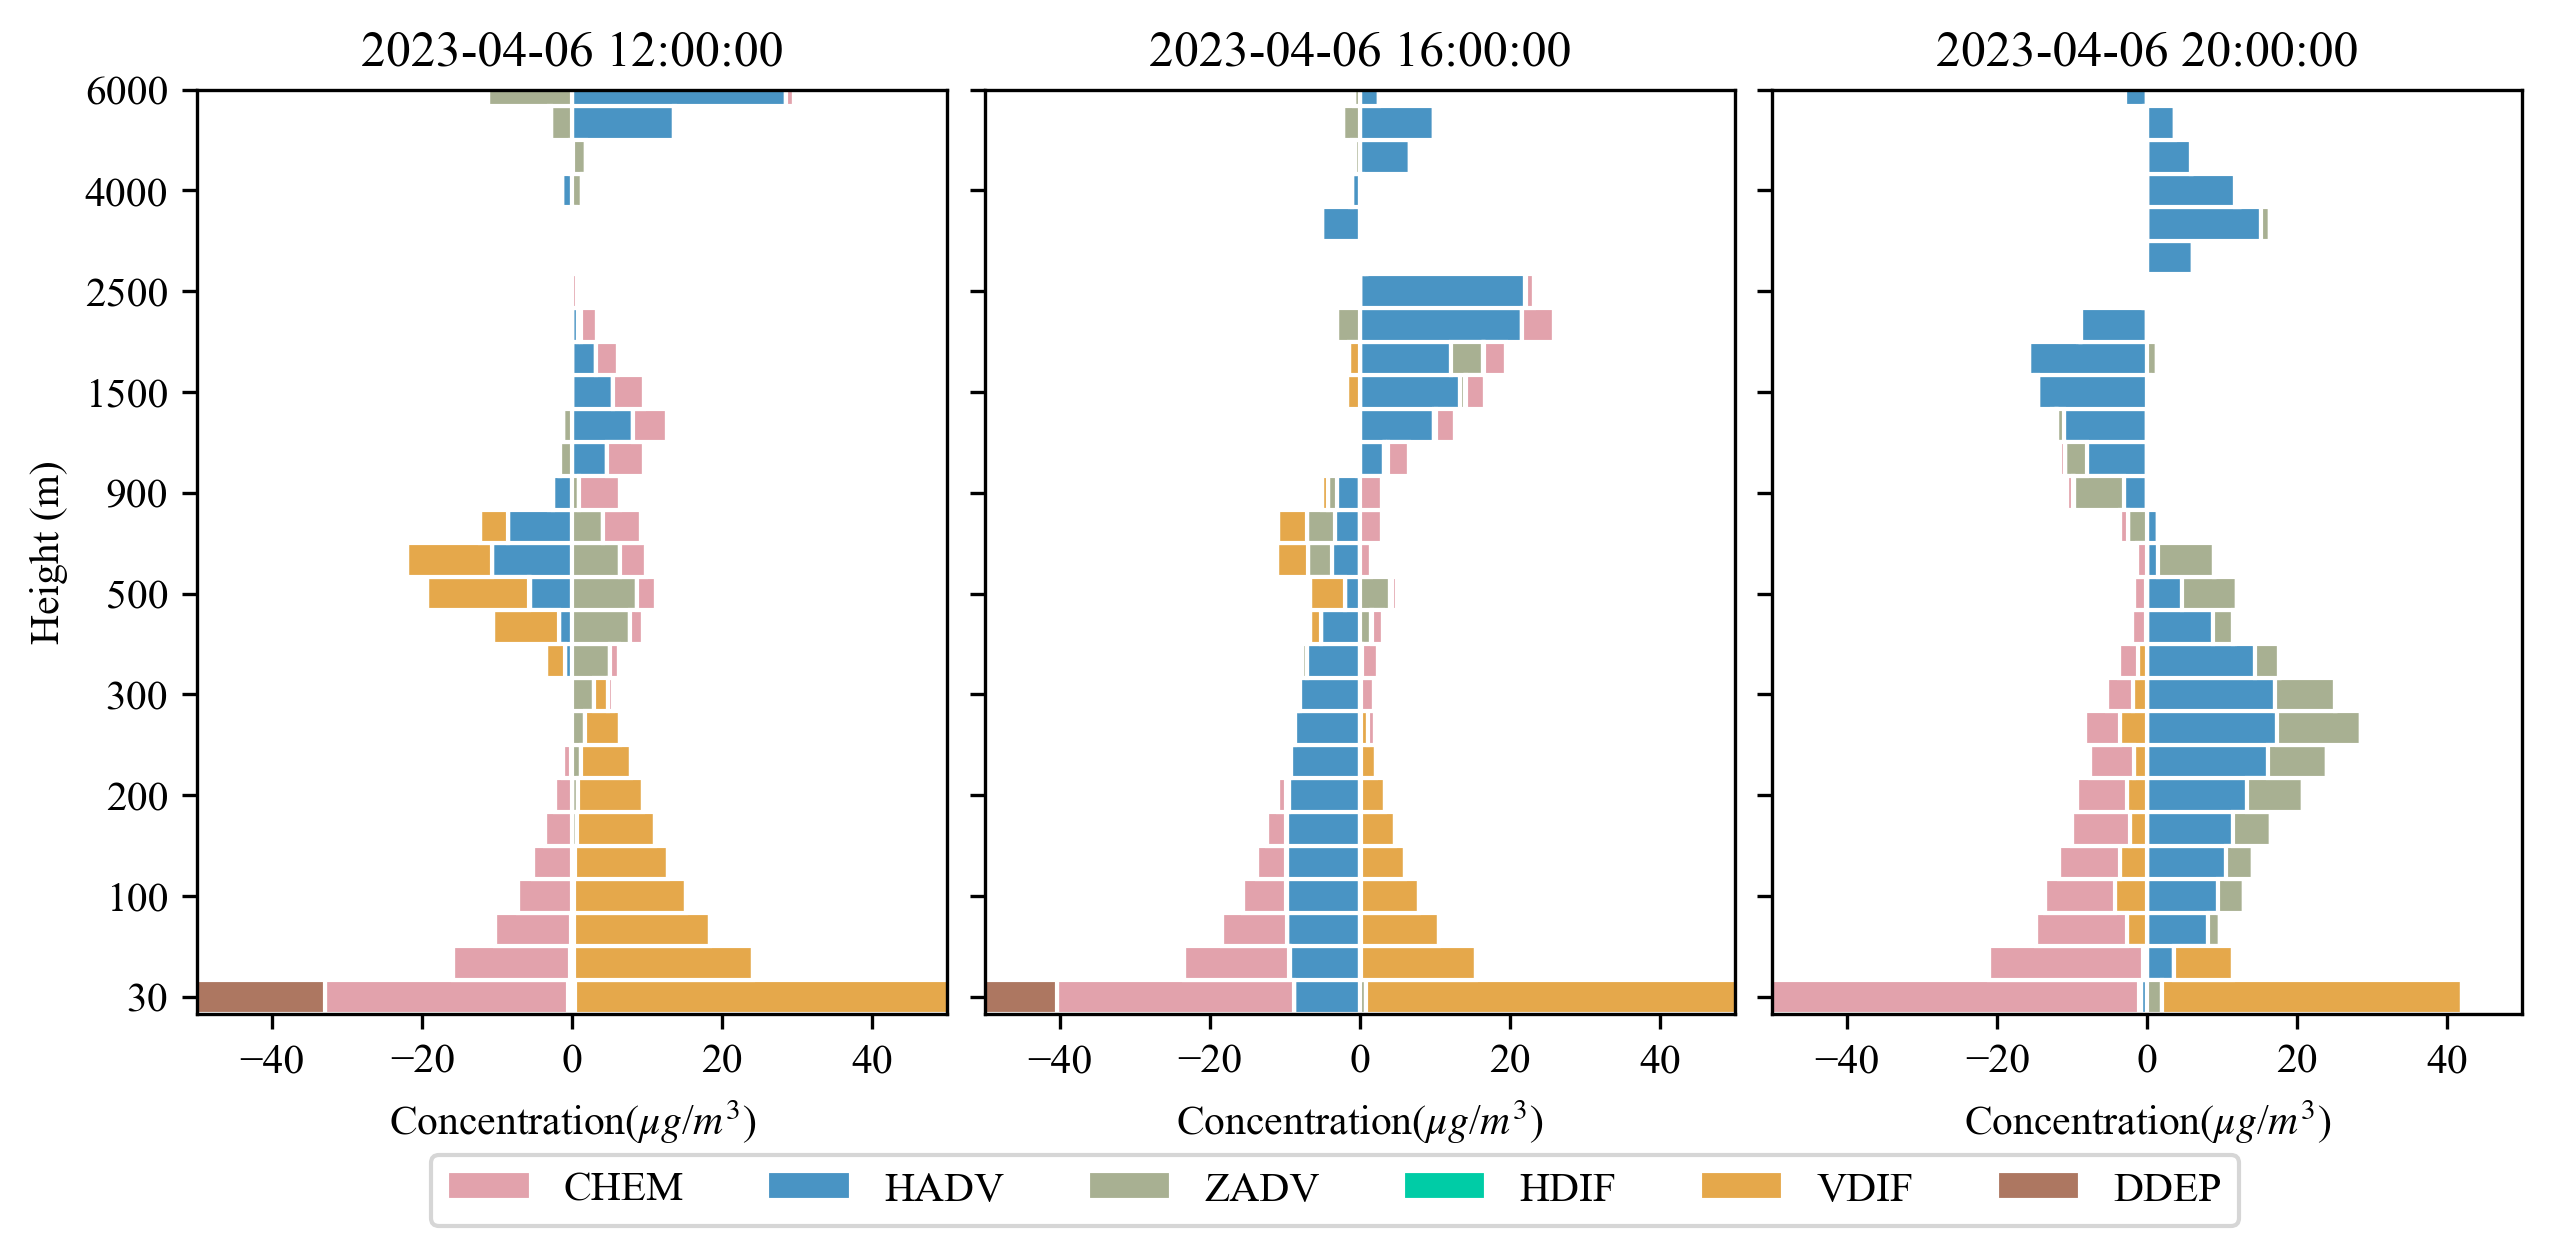

In [22]:
h   = np.arange(0,28)

date = 6
hour = np.array([12,16,20])
tstep = (date-1)*24+hour-1

# ========================================================================================

fig = plt.figure(figsize=(10,4),dpi=300)
ax  = fig.subplots(1,3,sharey=True,sharex=True)

for i in range(3):
    b1=ax[i].barh(h,hadv_pos[tstep[i],:],color=color_hadv,height=1,edgecolor=edgec)
    ax[i].barh(h,hadv_neg[tstep[i],:],color=color_hadv,height=1,edgecolor=edgec)

    b2=ax[i].barh(h,zadv_pos[tstep[i],:],color=color_zadv,left=hadv_pos[tstep[i],:],height=1,edgecolor=edgec)
    ax[i].barh(h,zadv_neg[tstep[i],:],color=color_zadv,left=hadv_neg[tstep[i],:],height=1,edgecolor=edgec)

    b3=ax[i].barh(h,hdif_pos[tstep[i],:],color=color_hdif,left=hadv_pos[tstep[i],:]+zadv_pos[tstep[i],:],height=1,edgecolor=edgec)
    ax[i].barh(h,hdif_neg[tstep[i],:],color=color_hdif,left=hadv_neg[tstep[i],:]+zadv_neg[tstep[i],:],height=1,edgecolor=edgec)

    b4=ax[i].barh(h,vdif_pos[tstep[i],:],color=color_vdif,left=hadv_pos[tstep[i],:]+zadv_pos[tstep[i],:]+hdif_pos[tstep[i],:],height=1,edgecolor=edgec)
    ax[i].barh(h,vdif_neg[tstep[i],:],color=color_vdif,left=hadv_neg[tstep[i],:]+zadv_neg[tstep[i],:]+hdif_neg[tstep[i],:],height=1,edgecolor=edgec)

    b5=ax[i].barh(h,chem_pos[tstep[i],:],color=color_chem,left=hadv_pos[tstep[i],:]+zadv_pos[tstep[i],:]+vdif_pos[tstep[i],:]+hdif_pos[tstep[i],:],
                height=1,edgecolor=edgec)
    ax[i].barh(h,chem_neg[tstep[i],:],color=color_chem,left=hadv_neg[tstep[i],:]+zadv_neg[tstep[i],:]+vdif_neg[tstep[i],:]+hdif_neg[tstep[i],:],
                height=1,edgecolor=edgec)

    b6=ax[i].barh(h,ddep_pos[tstep[i],:],color=color_ddep,left=hadv_pos[tstep[i],:]+zadv_pos[tstep[i],:]+vdif_pos[tstep[i],:]+hdif_pos[tstep[i],:]+chem_pos[tstep[i],:],
                height=1,edgecolor=edgec)
    ax[i].barh(h,ddep_neg[tstep[i],:],color=color_ddep,left=hadv_neg[tstep[i],:]+zadv_neg[tstep[i],:]+vdif_neg[tstep[i],:]+hdif_neg[tstep[i],:]+chem_neg[tstep[i],:],
                height=1,edgecolor=edgec)
    
    ax[i].set_title(pd.to_datetime(
            '2023-04-'+str(date)+'T'+str(hour[i]).zfill(2)
            ).strftime('%Y-%m-%d %H:%M:%S'))
    ax[i].set_xlim(-50,50)
    ax[i].set_ylim(-0.5,27)
    ax[i].set_xlabel('Concentration($\mu$$g$/$m^3$)')
    ax[i].set_xticks(np.arange(-40,41,20))
    ax[i].set_yticks(np.arange(0,28,3))
    if i > 0:
        ax[i].set_yticklabels([])

ax[0].set_ylabel('Height (m)')
ax[0].set_yticklabels(['30','100','200','300','500','900','1500','2500','4000','6000'])

ax[1].legend((b5,b1,b2,b3,b4,b6),
             ('CHEM','HADV','ZADV','HDIF','VDIF','DDEP'),
             bbox_to_anchor=(1.7,-0.13),ncol=6)

plt.subplots_adjust(wspace=0.05,hspace=0.05)

plt.show()

In [27]:
h = np.arange(0,28)

dates_low   = np.array([5,6,24,25,29])
dates_high  = np.array([2,10,12,16,17,27,28])
hours_day   = np.array([12,16,20])
hours_night = np.array([4,8,22])

for date in dates_high:
    tstep = (date-1)*24+hours_night-1

    fig = plt.figure(figsize=(10,4),dpi=300)
    ax  = fig.subplots(1,3,sharey=True,sharex=True)

    for i in range(3):
        b1=ax[i].barh(h,hadv_pos[tstep[i],:],color=color_hadv,height=1,edgecolor=edgec)
        ax[i].barh(h,hadv_neg[tstep[i],:],color=color_hadv,height=1,edgecolor=edgec)

        b2=ax[i].barh(h,zadv_pos[tstep[i],:],color=color_zadv,left=hadv_pos[tstep[i],:],height=1,edgecolor=edgec)
        ax[i].barh(h,zadv_neg[tstep[i],:],color=color_zadv,left=hadv_neg[tstep[i],:],height=1,edgecolor=edgec)

        b3=ax[i].barh(h,hdif_pos[tstep[i],:],color=color_hdif,left=hadv_pos[tstep[i],:]+zadv_pos[tstep[i],:],height=1,edgecolor=edgec)
        ax[i].barh(h,hdif_neg[tstep[i],:],color=color_hdif,left=hadv_neg[tstep[i],:]+zadv_neg[tstep[i],:],height=1,edgecolor=edgec)

        b4=ax[i].barh(h,vdif_pos[tstep[i],:],color=color_vdif,left=hadv_pos[tstep[i],:]+zadv_pos[tstep[i],:]+hdif_pos[tstep[i],:],height=1,edgecolor=edgec)
        ax[i].barh(h,vdif_neg[tstep[i],:],color=color_vdif,left=hadv_neg[tstep[i],:]+zadv_neg[tstep[i],:]+hdif_neg[tstep[i],:],height=1,edgecolor=edgec)

        b5=ax[i].barh(h,chem_pos[tstep[i],:],color=color_chem,left=hadv_pos[tstep[i],:]+zadv_pos[tstep[i],:]+vdif_pos[tstep[i],:]+hdif_pos[tstep[i],:],
                        height=1,edgecolor=edgec)
        ax[i].barh(h,chem_neg[tstep[i],:],color=color_chem,left=hadv_neg[tstep[i],:]+zadv_neg[tstep[i],:]+vdif_neg[tstep[i],:]+hdif_neg[tstep[i],:],
                        height=1,edgecolor=edgec)

        b6=ax[i].barh(h,ddep_pos[tstep[i],:],color=color_ddep,left=hadv_pos[tstep[i],:]+zadv_pos[tstep[i],:]+vdif_pos[tstep[i],:]+hdif_pos[tstep[i],:]+chem_pos[tstep[i],:],
                        height=1,edgecolor=edgec)
        ax[i].barh(h,ddep_neg[tstep[i],:],color=color_ddep,left=hadv_neg[tstep[i],:]+zadv_neg[tstep[i],:]+vdif_neg[tstep[i],:]+hdif_neg[tstep[i],:]+chem_neg[tstep[i],:],
                        height=1,edgecolor=edgec)
    
        ax[i].set_title(pd.to_datetime(
                '2023-04-'+str(date)+'T'+str(hour[i]).zfill(2)
                ).strftime('%Y-%m-%d %H:%M:%S'))
        ax[i].set_xlim(-50,50)
        ax[i].set_ylim(-0.5,27)
        ax[i].set_xlabel('Concentration($\mu$$g$/$m^3$)')
        ax[i].set_xticks(np.arange(-40,41,20))
        ax[i].set_yticks(np.arange(0,28,3))
        if i > 0:
                ax[i].set_yticklabels([])

    ax[0].set_ylabel('Height (m)')
    ax[0].set_yticklabels(['30','100','200','300','500','900','1500','2500','4000','6000'])

    ax[1].legend((b5,b1,b2,b3,b4,b6),
            ('CHEM','HADV','ZADV','HDIF','VDIF','DDEP'),
            bbox_to_anchor=(1.7,-0.13),ncol=6)

    plt.subplots_adjust(wspace=0.05,hspace=0.05)
    plt.savefig('D:/Download/pa_high_night_'+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d')+'.png')
    print('saving '+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d'))
    plt.close()

saving 04-02
saving 04-10
saving 04-12
saving 04-16
saving 04-17
saving 04-27
saving 04-28
